In [1]:
import pandas as pd
import ast
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import string 


In [2]:
# read dataset.csv
df = pd.read_csv("Getranke.csv",sep=';', encoding ='utf-8')

df = df.drop_duplicates(['recipe_name'])

y = df[df['recipe_url'] =='[]']
index = y.index.tolist()
df = df.drop(index =[13689])


t = df[df['tags'] =='[]']
index_m = t.index.tolist()
index_m
df = df.drop(index =index_m)
df
# df.shape


,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url
0,Getränke,Bananendrink 2. Art,"['Getränk', 'Vegetarisch', 'Schnell', 'einfach...",3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,NaN,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...
1,Getränke,Obst-Smoothie mit Avocado und Ingwer,"['Getränk', 'Vegetarisch', 'Vegan', 'Frucht', ...",3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...
2,Getränke,Baccardibowle,"['Getränk', 'Bowle']",3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...
3,Getränke,Russian Bahama Mama,"['Cocktail', 'Getränk', 'Party']",3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...
4,Getränke,Pfirsich - Bananen - Smoothie,"['Getränk', 'Sommer', 'Vegetarisch', 'Schnell'...",3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...
...,...,...,...,...,...,...,...,...,...,...,...
14529,Getränke,Brombeerlikör mit innerer Glut,"['Getränk', 'Herbst', 'Likör']",4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,NaN,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...
14530,Getränke,Cappucino Longata Speziale,"['Getränk', 'KaffeeTeeoderKakao']",4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...
14531,Getränke,Capt'n Cockienov,"['Getränk', 'Longdrink']",4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...
14532,Getränke,Schoko-Sahnelikör,"['Getränk', 'Schnell', 'einfach', 'Likör']",4.14,simpel,"['200ml', 'Eierlikör', '200ml', 'Amaretto', '2...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '08.11...",https://www.chefkoch.de/rezepte/21009613390138...


In [3]:
def tags_preprocess(tags):
    tags = tags.replace("'","")
    tags = tags.replace(" ","")
    tags = tags.replace("[","")
    tags = tags.replace("]","")
    tags = tags.split(",")
    tags = [x.lower() for x in tags]
    return tags


In [4]:
df.reset_index(inplace = True)
for i in range(len(df)):
    tags = df.loc[i]['tags']
    tags = tags_preprocess(tags)
    if "bowle" in tags:
        df.at[i,'tags'] ='bowle'
    if "longdrink" in tags:
        df.at[i,'tags'] ='cocktail'
    if "cocktail" in tags:
        df.at[i,'tags'] ='cocktail'
    if "alkoholfrei" in tags:
        df.at[i,'tags'] ='cocktail'
    if "kaffeeteeoderkakao" in tags:
        df.at[i,'tags'] ='kaffee&tee&kakao'
    if "tee" in tags:
        df.at[i,'tags'] ='kaffee&tee&kakao'
    if "kaffee" in tags:
        df.at[i,'tags'] ='kaffee&tee&kakao'
    if "getränke" in tags:
        df.at[i,'tags'] ='kaffee&tee&kakao'
    if "likör" in tags:
        df.at[i,'tags'] ='likör'
    if "punsch" in tags:
        df.at[i,'tags'] ='punsch'
    if "shake" in tags:
        df.at[i,'tags'] ='shake' 
    if "paleo" in tags:
        df.at[i,'tags'] ='shake'
    if "frucht" in tags:
        df.at[i,'tags'] ='cocktail'
    if "dessert" in tags:
        df.at[i,'tags'] ='shake' 

In [5]:
df

,index,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url
0,0,Getränke,Bananendrink 2. Art,cocktail,3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,NaN,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...
1,1,Getränke,Obst-Smoothie mit Avocado und Ingwer,cocktail,3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...
2,2,Getränke,Baccardibowle,bowle,3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...
3,3,Getränke,Russian Bahama Mama,cocktail,3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...
4,4,Getränke,Pfirsich - Bananen - Smoothie,cocktail,3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...
...,...,...,...,...,...,...,...,...,...,...,...,...
12007,14529,Getränke,Brombeerlikör mit innerer Glut,likör,4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,NaN,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...
12008,14530,Getränke,Cappucino Longata Speziale,kaffee&tee&kakao,4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...
12009,14531,Getränke,Capt'n Cockienov,cocktail,4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...
12010,14532,Getränke,Schoko-Sahnelikör,likör,4.14,simpel,"['200ml', 'Eierlikör', '200ml', 'Amaretto', '2...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '08.11...",https://www.chefkoch.de/rezepte/21009613390138...


In [6]:
# data pre-processing
# If NaN for calorie and comment user -> change it to none!   
values_cal = {'calorie': 'none'}  
df = df.fillna(value=values_cal)
values_com = {'comment_user': 'no comment'} 
df = df.fillna(value=values_com)

pat = r"([-+]?\d*\.\d+|\d+)"
df["pre_time"] = df["preparation_time"].str.extract(pat, flags=0, expand=True)

# extract the recipe id from recipe urls
list_cat_no = []
i = 0
for item in df['recipe_url']:
    list_cat_no.append(item.split('/')[4])

# add one column "recipe_id" into the dataset and set it as the index of dataset
df['recipe_id'] = list_cat_no
df = df.set_index(["recipe_id"])

df_cat = df['tags']
# df_cat = df_cat[0:10]


punct = set(string.punctuation) 

# # get the sub categroien of tags
# def get_sub_cat(data):
#     list_tags = []
#     for item in df_cat.iteritems():
#         if (item != '[]'):
#             item_tag = item[1]
#             list_cat = list(item_tag)
#             list_cat_new = ''.join(x for x in list_cat if x not in punct) 
#             target_list = [x for x in list_cat_new.split(' ')]
#             list_tags.append(target_list[-1])
#     return list_tags

# df['sub_categorize'] = get_sub_cat(df_cat)

df


,index,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time
recipe_id,,,,,,,,,,,,,
1769081286862304,0,Getränke,Bananendrink 2. Art,cocktail,3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,none,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...,5
3012431454075648,1,Getränke,Obst-Smoothie mit Avocado und Ingwer,cocktail,3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...,5
38671013004033,2,Getränke,Baccardibowle,bowle,3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...,10
2338891372270191,3,Getränke,Russian Bahama Mama,cocktail,3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...,2
1825151296038527,4,Getränke,Pfirsich - Bananen - Smoothie,cocktail,3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087751337250043,14529,Getränke,Brombeerlikör mit innerer Glut,likör,4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,none,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...,45
169051073397375,14530,Getränke,Cappucino Longata Speziale,kaffee&tee&kakao,4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...,10
2786451430770696,14531,Getränke,Capt'n Cockienov,cocktail,4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...,2


# Recipe Rating Distribution

Text(0, 0.5, 'Normalized Frequency of recipes')

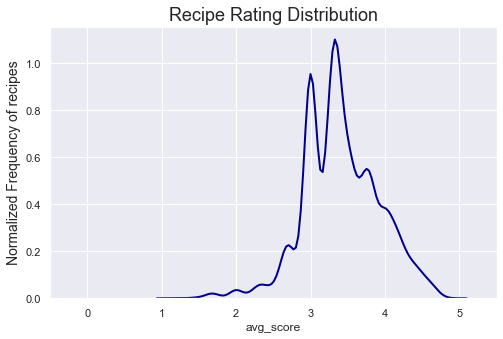

In [30]:
# delete the recipes, which have no average score.
df_null_score = df[df['avg_score'] =='0']
index_s = df_null_score.index.tolist()
df_avg = df.drop(index =index_s)
df_avg

avg_count = df_avg['avg_score'].value_counts()
df_count = avg_count.to_frame()
df_count
list_score = avg_count.index.tolist()
list_score
d = df_avg['avg_score'].value_counts()
list_count = d.values.tolist()
list_count

from pandas.core.frame import DataFrame
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set()
sns.distplot(df_avg['avg_score'],hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# sns.distplot(df_avg['avg_score'], hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})

# plt.grid(linestyle='-.')
plt.title('Recipe Rating Distribution', fontsize=18)
plt.xlim(-0.5,5.5,0.8)
plt.ylabel('Normalized Frequency of recipes',fontsize=14)
# plt.show()



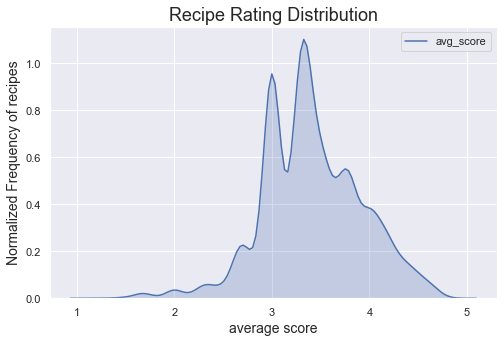

In [31]:
plt.figure(figsize=(8, 5))
sns.set()
sns.kdeplot(df_avg['avg_score'], shade=True)
plt.title('Recipe Rating Distribution', fontsize=18)
# plt.xlim(-0.5,5.5,0.8)
plt.ylabel('Normalized Frequency of recipes',fontsize=14)
plt.xlabel('average score',fontsize=14)
plt.show()

# preparation time of recipes in different kinds of drinks

In [8]:
# delete recipes, which has the most high preparation time but only one
df_time = df.groupby('preparation_time').filter(lambda x: len(x) > 10)

# divide the recipes into different preparation time groups
def pre_time_group(pre_time):   
    pre_time = int(pre_time)    
    if pre_time < 20:
        bucket = '<20 Min'    
    if pre_time in range(20, 41):
        bucket = '20-40 Min'        
    if pre_time in range(40, 61):
        bucket = '40-60 Min'        
    if pre_time in range(60, 81):
        bucket = '50-59 Min'
    if pre_time >= 81:
        bucket = '80+ Min'
    return bucket

df_time['pretime_group'] = df_time['pre_time'].apply(pre_time_group)
# df_time = df_time['pre_time']
df_time


/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time,pretime_group
recipe_id,,,,,,,,,,,,,,
1769081286862304,0,Getränke,Bananendrink 2. Art,cocktail,3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,none,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...,5,<20 Min
3012431454075648,1,Getränke,Obst-Smoothie mit Avocado und Ingwer,cocktail,3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...,5,<20 Min
38671013004033,2,Getränke,Baccardibowle,bowle,3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...,10,<20 Min
2338891372270191,3,Getränke,Russian Bahama Mama,cocktail,3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...,2,<20 Min
1825151296038527,4,Getränke,Pfirsich - Bananen - Smoothie,cocktail,3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...,5,<20 Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087751337250043,14529,Getränke,Brombeerlikör mit innerer Glut,likör,4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,none,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...,45,40-60 Min
169051073397375,14530,Getränke,Cappucino Longata Speziale,kaffee&tee&kakao,4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...,10,<20 Min
2786451430770696,14531,Getränke,Capt'n Cockienov,cocktail,4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...,2,<20 Min


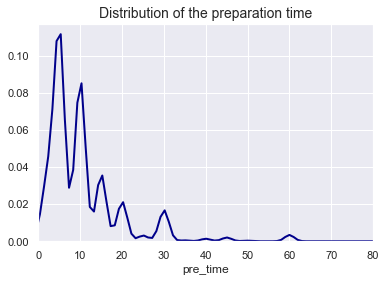

<Figure size 576x360 with 0 Axes>

In [9]:
threshold=80
ax = sns.distplot(df_time['pre_time'],hist=False, kde=True, 
             bins=int(120/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

ax.set_title('Distribution of the preparation time', fontsize = 14)

plt.figure(figsize=(8, 5))
a = ax.set_xlim((0,threshold))

# plt.title('Distribution of the preparation time')

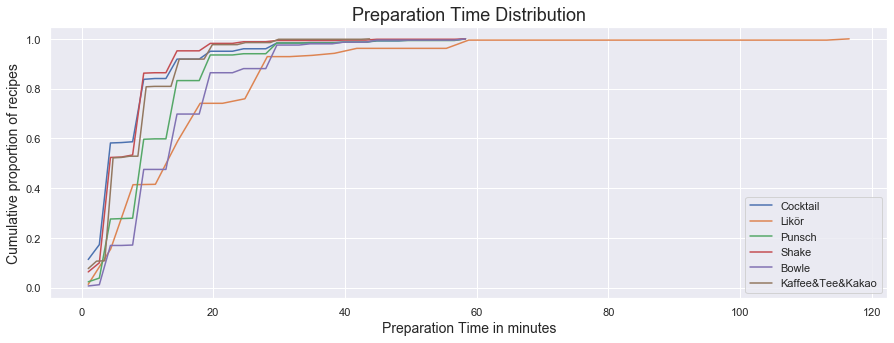

In [10]:
from pandas.core.frame import DataFrame
# Plot the cooking time's cumulative distribution for a sample of european and asian countries.
plt.figure(figsize=(15,5))
x1 = list(df_time[df_time['tags'] == 'cocktail']['pre_time'])
x2 = list(df_time[df_time['tags'] == 'likör']['pre_time'])
x3 = list(df_time[df_time['tags'] == 'punsch']['pre_time'])
x4 = list(df_time[df_time['tags'] == 'shake']['pre_time'])
x5 = list(df_time[df_time['tags'] == 'bowle']['pre_time'])
x6 = list(df_time[df_time['tags'] == 'kaffee&tee&kakao']['pre_time'])

pretime_sample = pd.concat([pd.DataFrame({'cocktail': x1}), 
                            pd.DataFrame({'likör':x2}), 
                            pd.DataFrame({'punsch':x3}),
                            pd.DataFrame({'shake':x4}),
                            pd.DataFrame({'bowle':x5}),
                            pd.DataFrame({'kaffee&tee&kakao':x6})], axis=1)
pretime_sample = pretime_sample.dropna()
pretime_sample
# For each cuisine compute the cumulative distribution of the preparation time and plot it.
for item in pretime_sample:
    pre = pretime_sample[item].astype(np.float)
    prep_times = pretime_sample[item].astype(np.float)
    values, base = np.histogram(prep_times, bins=35)
    # Compute the cumulative distribution
    cumulative = np.cumsum(values)
    cumulative = cumulative/cumulative.max()
    ax = plt.plot(base[:-1], cumulative)

plt.ylabel("Cumulative proportion of recipes", fontsize=14)
plt.xlabel("Preparation Time in minutes", fontsize=14)
plt.legend([c_title.title() for c_title in pretime_sample])
plt.title('Preparation Time Distribution',fontsize=18)
plt.grid(True)

In [11]:
# cummulative proportion graoh refers to https://alioben.github.io/yummly/

# What peoples drink in different groups?

In [12]:

def extract_com_user(data):
    df_com = pd.DataFrame()
    for index, item in data_com['comment_user'].iteritems():
        if (item != '[]'):
            if (item != 'no comment'):
                array = ast.literal_eval(item)
                df_array = pd.DataFrame(array)
                df_array['recipe_id'] = index
                df_com = pd.concat([df_com,df_array])
    return df_com

In [13]:
def sub_cat_in_com(data):
    list_sub_cat = []
    df_com2 = pd.DataFrame()
    for index, item in data_com['tags'].iteritems(): 
        if (item != '[]'):
            list_sub = list(item)
            list_sub = ''.join(x for x in list_sub if x not in punct)
            list_sub_cat.append(list_sub)
    df_sub_cat = pd.DataFrame(list_sub_cat)
    df_sub_cat['tags'] = df_sub_cat
    df_sub_cat['recipe_id'] = data_com['tags'].index     
    df_com2 = pd.concat([df_com2,df_sub_cat])
    return df_com2

In [36]:
data_com = df[['comment_user','tags']]

df_com = extract_com_user(data_com['comment_user'])
df_com
df_com2 = sub_cat_in_com(data_com['tags'])

df_com_new = df_com.merge(df_com2, on='recipe_id', how='left')
df_com_new = df_com_new.set_index(["recipe_id"])
df_com_new = df_com_new.drop(0, 1)
df_com_new


,rating,comment_time,name,sex,age,marriage_status,job,tags
recipe_id,,,,,,,,
1769081286862304,rating-5,06.08.2019 15:13,Hobbykoch-Bine68,weiblich,51 Jahre,Vergeben,None,cocktail
1769081286862304,rating-5,29.05.2019 15:00,ankebrandenburg,weiblich,41 Jahre,Vergeben,Schichtleiterin bei Backwerk,cocktail
1769081286862304,rating-4,16.03.2015 17:52,patty89,weiblich,None,Verheiratet,None,cocktail
1769081286862304,rating-4,17.06.2013 21:15,gloryous,weiblich,34 Jahre,Vergeben,Wissenschaftliche Mitarbeiterin,cocktail
1769081286862304,rating-4,28.06.2011 19:46,Schlemmermax,männlich,41 Jahre,Vergeben,None,cocktail
...,...,...,...,...,...,...,...,...
2100961339013833,rating-5,03.12.2013 14:11,anitatied,weiblich,49 Jahre,Verheiratet,None,likör
2100961339013833,rating-4,24.07.2012 20:53,Bigote,weiblich,None,Vergeben,None,likör
2228381357079938,rating-5,05.12.2019 09:29,Süße_Puddingschnecke,weiblich,16 Jahre,Single,Schülerin,punsch


In [38]:
df_null_age = df_com_new[df_com_new['age'] =='None']
df_null_age
index_a = df_null_age.index.tolist()
df_age = df_com_new.drop(index =index_a)
df_age["age_num"] = df_age["age"].str.extract(pat, flags=0, expand=True)
df_age
# age_count = df_age['age'].value_counts()
# age_count

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,rating,comment_time,name,sex,age,marriage_status,job,tags,age_num
recipe_id,,,,,,,,,
3175441472580330,rating-5,23.11.2019 19:05,Superkoch-kathimaus,weiblich,33 Jahre,Verheiratet,None,cocktail,33
3175441472580330,rating-5,12.08.2019 14:12,Hobbykoch-Bine68,weiblich,51 Jahre,Vergeben,None,cocktail,51
3175441472580330,rating-4,23.06.2019 15:54,Bebberle,weiblich,50 Jahre,Vergeben,Sachbearbeiterin,cocktail,50
3175441472580330,rating-4,15.08.2017 13:58,gloryous,weiblich,34 Jahre,Vergeben,Wissenschaftliche Mitarbeiterin,cocktail,34
3175441472580330,rating-4,06.09.2016 21:56,Mamamummel,weiblich,66 Jahre,Verheiratet,Familienboss,cocktail,66
...,...,...,...,...,...,...,...,...,...
276831105411267,rating-4,29.08.2014 18:07,hustenbonbon,männlich,34 Jahre,Verheiratet,None,cocktail,34
276831105411267,rating-5,12.10.2012 06:31,leeni2507,weiblich,41 Jahre,Verheiratet,Arzthelferin,cocktail,41
276831105411267,rating-5,16.08.2012 23:40,Pumpkin-Pie,weiblich,57 Jahre,Verheiratet,None,cocktail,57


In [16]:
def age_group(age):   
    age = int(age)    
    if age < 30:
        bucket = '<30 Jahre'    
    if age in range(30, 41):
        bucket = '30-40 Jahre'        
    if age in range(40, 51):
        bucket = '40-50 Jahre'        
    if age in range(50, 61):
        bucket = '50-60 Jahre'
    if age >= 61:
        bucket = '60+ Jahre'
    return bucket

In [17]:
def remove_none(data,name):
    data_none = data[data[name] =='None']
    index_n = data_none.index.tolist()
    df_without_non = data.drop(index =index_n)
    return df_without_non

In [18]:
a = 'sex'
df_sex = remove_none(df_com_new,a)
df_sex = df_sex.groupby('tags').filter(lambda x: len(x) > 100)
df_sex
group_sex = df_sex.groupby(['sex','tags']).count()
# group_sex = group_sex.groupby(level='sex').count()


from matplotlib.pyplot import *
from matplotlib.colors import LinearSegmentedColormap
# cm = LinearSegmentedColormap.from_list('tab20c',colors)
group_sex = group_sex['rating']
group_sex = pd.DataFrame(group_sex)
group_sex

rating
sex      tags                  
männlich bowle               77
         cocktail           892
         kaffeeteekakao     129
         likör              254
         punsch             104
         shake              184
weiblich bowle              515
         cocktail          4472
         kaffeeteekakao    1285
         likör             1334
         punsch             583
         shake             1636

In [19]:
# calculate the probability of male and female comment users 
df_1 = group_sex.iloc[0:6]
df_1['sum'] = 1640
df_1['scaled'] = df_1.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_2 = group_sex.iloc[6:12]
df_2['sum'] = 9825
df_2['scaled'] = df_2.apply(lambda x: x['rating'] / x['sum'], axis=1)

frames_s = [df_1,df_2]
df_group_sex_scaled = pd.concat(frames_s)
df_group_sex_scaled = df_group_sex_scaled['scaled']
df_group_sex_scaled

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

sex       tags          
männlich  bowle             0.046951
          cocktail          0.543902
          kaffeeteekakao    0.078659
          likör             0.154878
          punsch            0.063415
          shake             0.112195
weiblich  bowle             0.052417
          cocktail          0.455165
          kaffeeteekakao    0.130789
          likör             0.135776
          punsch            0.059338
          shake             0.166514
Name: scaled, dtype: float64

Text(0.5, 1.0, 'Sex group Distribution')

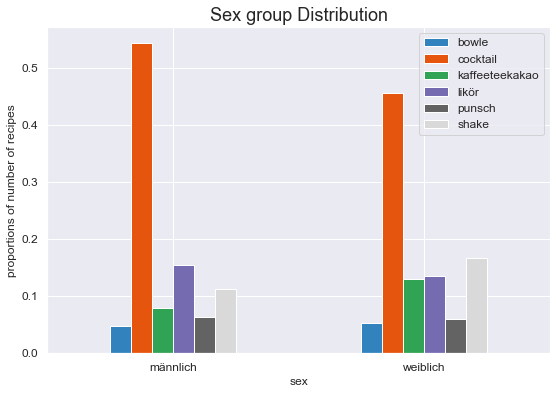

In [52]:
# group_sex.loc['männlich','rating']
# group_sex.loc['weiblich','rating']
fig, ax = subplots()
df_group_sex_scaled.unstack().plot(kind='bar',ax=ax, fontsize = 12,figsize=(9,6),rot=0, colormap='tab20c')
# colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#A569BD','#E74C3C']
ax.legend(fontsize=12)
plt.ylabel('proportions of number of recipes')
plt.title('Sex group Distribution',fontsize=18)
# group_sex.unstack().plot(kind='bar', stacked=True)

In [ ]:
def remove_item(data,name):
    data_none = data[data[name] =='None']
    index_n = data_none.index.tolist()
    df_without_non = data.drop(index =index_n)
    return df_without_non

In [59]:
b = 'marriage_status'

df_marriage = remove_none(df_com_new,b)
df_marriage

df_marriage = df_marriage.groupby('tags').filter(lambda x: len(x) > 10)
group_marriage = df_marriage.groupby(['marriage_status','tags']).count()
group_marriage = group_marriage['rating']
group_marriage = pd.DataFrame(group_marriage)
group_marriage

rating
marriage_status tags                  
Geschieden      bowle                1
                cocktail             8
                likör                3
Single          bowle               11
                cocktail           245
                kaffeeteekakao      39
                likör               62
                punsch              32
                shake               61
Vergeben        bowle               58
                cocktail           578
                kaffeeteekakao      86
                likör              135
                punsch              77
                shake              142
Verheiratet     bowle              125
                cocktail          1236
                kaffeeteekakao     200
                likör              318
                punsch             129
                shake              204
Verwitwet       bowle                8
                cocktail           152
                kaffeeteekakao      33
                likör               14
                punsch              11
                shake               75

In [50]:
df_marr_1 = group_marriage.iloc[0:3]
df_marr_1['sum'] = 12
df_marr_1['scaled'] = df_marr_1.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_marr_2 = group_marriage.iloc[3:9]
df_marr_2['sum'] = 450
df_marr_2['scaled'] = df_marr_2.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_marr_3 = group_marriage.iloc[9:15]
df_marr_3['sum'] = 1076
df_marr_3['scaled'] = df_marr_3.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_marr_4 = group_marriage.iloc[15:21]
df_marr_4['sum'] = 2212
df_marr_4['scaled'] = df_marr_4.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_marr_5 = group_marriage.iloc[21:27]
df_marr_5['sum'] = 293
df_marr_5['scaled'] = df_marr_5.apply(lambda x: x['rating'] / x['sum'], axis=1)

frames_m = [df_marr_1,df_marr_2,df_marr_3,df_marr_4,df_marr_5]
df_group_marr_scaled = pd.concat(frames_m)
df_group_marr_scaled = df_group_marr_scaled['scaled']
df_group_marr_scaled
# marr_cock = df_group_marr_scaled.loc[df_group_marr_scaled['tags'].isin(['cocktail','likör'])]
# marr_cock

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

marriage_status  tags          
Geschieden       bowle             0.083333
                 cocktail          0.666667
                 likör             0.250000
Single           bowle             0.024444
                 cocktail          0.544444
                 kaffeeteekakao    0.086667
                 likör             0.137778
                 punsch            0.071111
                 shake             0.135556
Vergeben         bowle             0.053903
                 cocktail          0.537175
                 kaffeeteekakao    0.079926
                 likör             0.125465
                 punsch            0.071561
                 shake             0.131970
Verheiratet      bowle             0.056510
                 cocktail          0.558770
                 kaffeeteekakao    0.090416
                 likör             0.143761
                 punsch            0.058318
                 shake             0.092224
Verwitwet        bowle             0.027304


Text(0.5, 1.0, 'Marriage Status group Distribution')

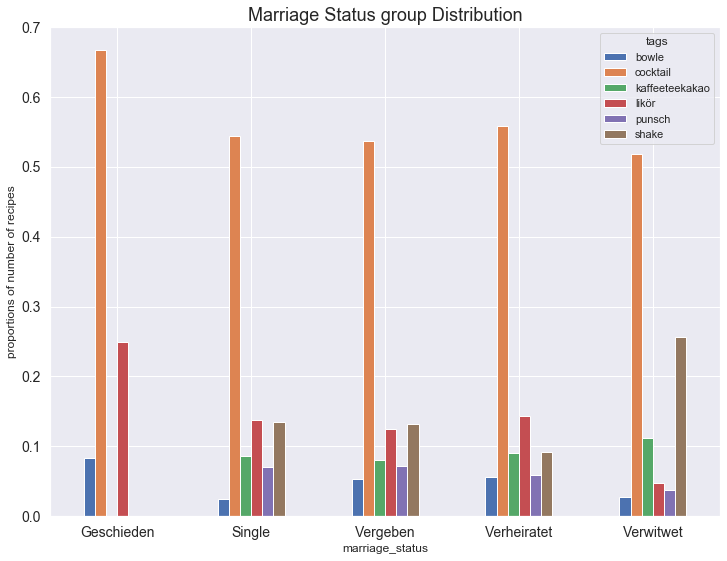

In [53]:
# group_marriage.loc['Verheiratet','rating']
# group_marriage
df_group_marr_scaled.unstack().plot(kind='bar',fontsize = 14,figsize=(12,9),rot=0)
ax.legend(fontsize=14)
plt.ylabel('proportions of number of recipes')
plt.title('Marriage Status group Distribution',fontsize=18)

In [60]:
df_age['age_group'] = df_age['age_num'].apply(age_group)
df_age
df_age = df_age.groupby('tags').filter(lambda x: len(x) > 50)
group_age = df_age.groupby(['age_group','tags']).count()
group_age = group_age['rating']
group_age = pd.DataFrame(group_age)

group_age


rating
age_group   tags                  
30-40 Jahre bowle               58
            cocktail           580
            kaffeeteekakao      93
            likör               95
            punsch              48
            shake              117
40-50 Jahre bowle               28
            cocktail           244
            kaffeeteekakao      54
            likör               81
            punsch              41
            shake               58
50-60 Jahre bowle               28
            cocktail           261
            kaffeeteekakao     132
            likör               87
            punsch              62
            shake               92
60+ Jahre   bowle               15
            cocktail           108
            kaffeeteekakao      25
            likör               38
            punsch              26
            shake               21
<30 Jahre   bowle               11
            cocktail           271
            kaffeeteekakao      51
            likör               26
            punsch              21
            shake               88

In [70]:
df_Age_1 = group_age.iloc[0:6]
df_Age_1['sum'] = 991
df_Age_1['scaled'] = df_Age_1.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_Age_2 = group_age.iloc[6:12]
df_Age_2['sum'] = 506
df_Age_2['scaled'] = df_Age_2.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_Age_3 = group_age.iloc[12:18]
df_Age_3['sum'] = 662
df_Age_3['scaled'] = df_Age_3.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_Age_4 = group_age.iloc[18:24]
df_Age_4['sum'] = 233
df_Age_4['scaled'] = df_Age_4.apply(lambda x: x['rating'] / x['sum'], axis=1)

df_Age_5 = group_age.iloc[24:30]
df_Age_5['sum'] = 468
df_Age_5['scaled'] = df_Age_5.apply(lambda x: x['rating'] / x['sum'], axis=1)

frames_A = [df_Age_1,df_Age_2,df_Age_3,df_Age_4,df_Age_5]
df_group_age_scaled = pd.concat(frames_A)
df_group_age_scaled = df_group_age_scaled['scaled']
df_group_age_scaled

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

age_group    tags          
30-40 Jahre  bowle             0.058527
             cocktail          0.585267
             kaffeeteekakao    0.093845
             likör             0.095863
             punsch            0.048436
             shake             0.118063
40-50 Jahre  bowle             0.055336
             cocktail          0.482213
             kaffeeteekakao    0.106719
             likör             0.160079
             punsch            0.081028
             shake             0.114625
50-60 Jahre  bowle             0.042296
             cocktail          0.394260
             kaffeeteekakao    0.199396
             likör             0.131420
             punsch            0.093656
             shake             0.138973
60+ Jahre    bowle             0.064378
             cocktail          0.463519
             kaffeeteekakao    0.107296
             likör             0.163090
             punsch            0.111588
             shake             0.090129
<30 Jahre   

Text(0.5, 1.0, 'Age group Distribution')

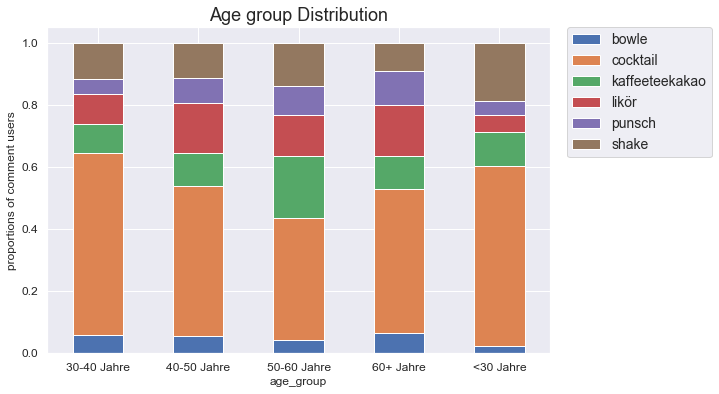

In [72]:
# group_age.unstack().plot(kind='bar')
df_group_age_scaled.unstack().plot(kind='bar', stacked=True,figsize=(9,6),rot=0, fontsize = 12)
plt.ylabel('proportions of comment users')
plt.legend(fontsize=14,bbox_to_anchor=(1.02,0.8),loc='center left')
plt.title('Age group Distribution',fontsize=18)

In [26]:
# reference: https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors

In [27]:
# Make a separate list for each kind of drinks
# x1 = list(df_time[df_time['sub_categorize'] == 'alkoholfrei']['pre_time'])

# x2 = list(df_time[df_time['sub_categorize'] == 'Longdrink']['pretime_group'])
# x3 = list(df_time[df_time['sub_categorize'] == 'Likör']['pretime_group'])
# x4 = list(df_time[df_time['sub_categorize'] == 'Punsch']['pretime_group'])
# x5 = list(df_time[df_time['sub_categorize'] == 'Shake']['pretime_group'])
# x6 = list(df_time[df_time['sub_categorize'] == 'Bowle']['pretime_group'])
# x7 = list(df_time[df_time['sub_categorize'] == 'KaffeeTeeoderKakao']['pretime_group'])

# # Assign colors for each type and the names
# colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#A569BD','#E74C3C']
# names = ['alkoholfrei', 'Longdrink', 'Likör',
#          'Punsch', 'Shake','Bowle','Kaffee&Tee&Kakao']
         
# # Make the histogram using a list of lists
# # Normalize the frequency of recipes and assign colors and names
# plt.figure(figsize=(9, 6))
# plt.hist([x1, x2, x3, x4, x5,x6,x7], bins = int(100/15), normed=True,
#          color = colors, label=names)

# # Plot formatting
# plt.legend()
# plt.xlabel('Pre_time(min)')
# plt.ylabel('Normed recipes')
# plt.title('Preparation Time Distribution',fontsize=18)